In [109]:
from pathlib import Path

is_colab = False  # if run in colab set this true

In [111]:
# setup the environment


if is_colab:

  from google.colab import drive
  drive.mount('/content/gdrive')
  
  path_root = Path('/content/gdrive/My Drive/Colab Notebooks/')
  
  # install the pynvcenter package from github
  !pip install git+https://github.com/JanGieseler/pynvcenter.git
    
    
    
  from keras import backend as K
  print(K.tensorflow_backend._get_available_gpus())
else:
  path_root = Path('../')
  
  # for the local version we assume that pynvcenter is located in the parent dir of the notebook
  import os,sys,inspect
  currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
  parentdir = os.path.dirname(currentdir)
  sys.path.insert(0,parentdir) 

path_ipynb = path_root/'notebooks'
path_data = path_root/'data'
path_model = path_root/'models'
path_html = path_root/'html'

PosixPath('../html')

In [112]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import pynvcenter.nv_analysis as nv_analysis

from sklearn.externals import joblib

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from keras import optimizers
from sklearn.metrics import mean_squared_error
from keras.callbacks import Callback
from sklearn.externals import joblib
import h5py
from keras import regularizers

from sklearn.model_selection import learning_curve

from keras.callbacks import EarlyStopping, ModelCheckpoint
import time

import matplotlib.pyplot as plt


from matplotlib.patches import Rectangle

%matplotlib inline

from tqdm import tqdm

import h5py
%load_ext autoreload
%autoreload 2
from keras.models import load_model

from glob import glob

import matplotlib 

from IPython.display import display, Markdown

FONT_SIZE = 20
matplotlib.rc('xtick', labelsize=FONT_SIZE) 
matplotlib.rc('ytick', labelsize=FONT_SIZE) 
matplotlib.rc('axes', titlesize=FONT_SIZE) 
matplotlib.rc('axes', labelsize=FONT_SIZE) 
matplotlib.rc('lines', linewidth=2) 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
from pynvcenter.nn_utils import *

### show the experimental data
#### define inputs (filenames, calibration, etc.)

##### From 190123

In [87]:
# filename_esr = '../data_exp/190122-15_41_20_esr_many_on_alice_wider_range_center_0_0_esr_map.h5'
# filename_pos = '../data_exp/190122-15_40_40_select_points'


filename_pos = '../data_exp/190123-19_32_44_select_points'

filename_esr = '../data_exp/190123-19_39_47_esr_many_on_alice_wider_range_center_0_0'




freq_center = 2870000000.0
freq_range = 500000000.0


calibration_factor = 200/162 * 267 / 0.5  # mu / px * px / V = mu / V

particle_radius = 19  # um

print('the calibration factor is {:0.3f} micrometers / volt'.format(calibration_factor))

h5f = h5py.File(filename_esr+'_esr_map.h5', 'r')
esr_map = np.array(h5f['esr_map'])
frequencies = np.array(h5f['frequency'])
h5f.close()
print('frequencies from {:0.3f}GHz - {:0.3f}GHz'.format(1e-9*(freq_center-freq_range/2), 1e-9*((freq_center+freq_range/2))))

the calibration factor is 659.259 micrometers / volt
frequencies from 2.620GHz - 3.120GHz


##### From 190125

In [253]:
filename_pos = '../data_exp/190125-21_00_31_select_points'

filenames_esr = [
    '../data_exp/190125-21_01_46_esr_many_on_alice_wider_range_center_0_0',
    '../data_exp/190127-18_08_52_esr_many_on_alice_wider_range_center_0_0'
                ]

freq_center = 2870000000.0
freq_range = 500000000.0


img_dims = [50, 200]

calibration_factor = 200/162 * 267 / 0.5  # mu / px * px / V = mu / V

particle_radius = 19  # um

print('the calibration factor is {:0.3f} micrometers / volt'.format(calibration_factor))

esr_map = None
for filename_esr in filenames_esr:
    print(filename_esr)
    h5f = h5py.File(filename_esr+'_esr_map.h5', 'r')
    
    if esr_map is None:
        esr_map = np.array(h5f['esr_map'])
    else:
        esr_map += np.array(h5f['esr_map'])
    frequencies = np.array(h5f['frequency'])
    h5f.close()
print('frequencies from {:0.3f}GHz - {:0.3f}GHz'.format(1e-9*(freq_center-freq_range/2), 1e-9*((freq_center+freq_range/2))))
esr_map /=len(filenames_esr)

the calibration factor is 659.259 micrometers / volt
../data_exp/190125-21_01_46_esr_many_on_alice_wider_range_center_0_0
../data_exp/190127-18_08_52_esr_many_on_alice_wider_range_center_0_0
frequencies from 2.620GHz - 3.120GHz


In [313]:

padding_dims
# esr_map[-padding_dims[0,0]:]
# [esr_map.shape[1]+p for p in padding_dims[1]]
padding_dims[1][0],padding_dims[1][1]

# X[:,26:225].shape
# XX

np.arange(300)[padding_dims[1][0]-1:padding_dims[1][1]]

array([ 25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 20

In [325]:
angles[-padding_dims[0][0]:]-360, 360+angles[0:padding_dims[0][1]]

(array([-16.,  -8.]), array([360., 368., 376.]))

In [326]:
angles

array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
        88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168.,
       176., 184., 192., 200., 208., 216., 224., 232., 240., 248., 256.,
       264., 272., 280., 288., 296., 304., 312., 320., 328., 336., 344.,
       352.])

In [327]:
np.hstack([angles[-padding_dims[0][0]:]-360, angles, 360+angles[0:padding_dims[0][1]]])

array([-16.,  -8.,   0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,
        72.,  80.,  88.,  96., 104., 112., 120., 128., 136., 144., 152.,
       160., 168., 176., 184., 192., 200., 208., 216., 224., 232., 240.,
       248., 256., 264., 272., 280., 288., 296., 304., 312., 320., 328.,
       336., 344., 352., 360., 368., 376.])

In [329]:
a.shape, f.shape, e.shape

((50,), (200,), (50, 200))

typically we expect to cut off the image along the frequency dimension and pad it in the angle dimension
(50, 200)


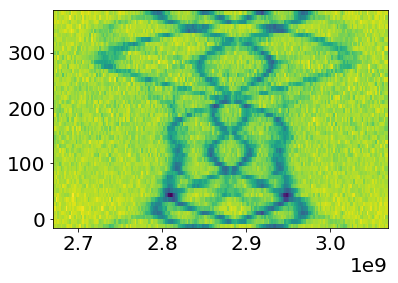

In [331]:
def pad_esr_map(frequencies, angles, esr_map, img_dims):


    padding_dims = [d-s for s, d in zip(esr_map.shape, img_dims)]
    print('typically we expect to cut off the image along the frequency dimension and pad it in the angle dimension')
    assert padding_dims[0]>=0
    assert padding_dims[1]<=0
    padding_dims = [[p//2, p-p//2] for p in padding_dims]  # calculate the padding dims for the left/right, up/down
    padding_dims[1] = [-padding_dims[1][0]-1, esr_map.shape[1]+padding_dims[1][0]] # for the freq we actually want the range
    esr_map = np.vstack([esr_map[-padding_dims[0][0]:], esr_map, esr_map[0:padding_dims[0][1]]])
    esr_map = esr_map[:,padding_dims[1][0]:padding_dims[1][1]]
    
    angles = np.hstack([angles[-padding_dims[0][0]:]-360, angles, 360+angles[0:padding_dims[0][1]]])
    frequencies = frequencies[padding_dims[1][0]:padding_dims[1][1]]
    return frequencies, angles, esr_map

f, a, e = pad_esr_map(frequencies, angles, esr_map, img_dims)
print(e.shape)  
plt.pcolor(f, a, e)
# img_dims[0]//2, img_dims[0]//2

In [333]:
f.min(), f.max()

(2670000000.0, 3068000000.0)

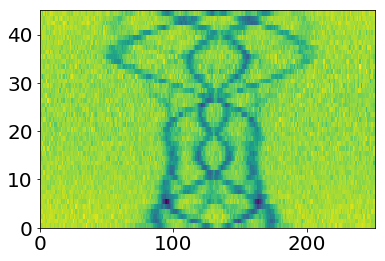

In [284]:
plt.pcolor(esr_map)

In [271]:
esr_map.shape

(45, 251)

In [270]:
XX = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])

np.vstack([XX[-1:], XX, XX[0:1]])

array([[10, 11, 12],
       [ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [ 1,  2,  3]])

In [269]:
XX[-1:]

array([[10, 11, 12]])

In [252]:
esr_map[img_dims].shape, 2**7

((45, 251), 128)

**esr radius:	 72.433 micrometers**

image dimensions:  (45, 251)


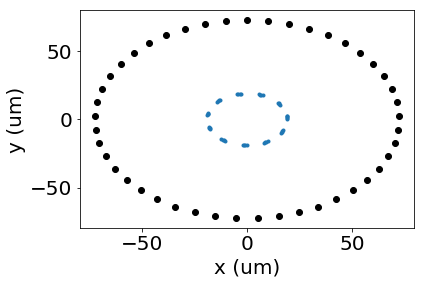

In [245]:
nv_positions = calibration_factor * np.genfromtxt(filename_pos+ '-nv_locations.csv', delimiter=',')[1:]  # positions in um
angles = np.genfromtxt(filename_pos+ '-angles.csv', delimiter=',')[1:]  # angles in rad

nv_positions -=np.mean(nv_positions, axis=0)  # center around zero 
nv_positions, angles = nv_positions[angles.argsort()], angles[angles.argsort()] # sort
for pos in nv_positions:
    plt.plot(pos[0], pos[1], 'ko')
    
# angles = np.linspace(0, 360, esr_map.shape[0])
plt.plot(particle_radius*np.cos(angles), particle_radius*np.sin(angles), '.')

radius  = np.mean(np.sqrt(np.sum(nv_positions**2, axis=1)))
display(Markdown('**esr radius:\t {:0.3f} micrometers**'.format(radius)))
plt.xlabel('x (um)')
plt.ylabel('y (um)')

print('image dimensions: ', esr_map.shape)

In [246]:
noise_region = {'fmin':2.65e9, 'f_range':1e8, 'angle_min':50, 'angle_range':150}

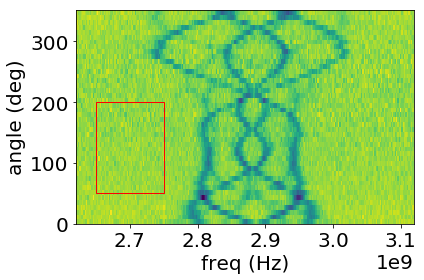

In [243]:
# angles = np.linspace(0, 360, esr_map.shape[0])
fig, ax = plt.subplots(1, 1, figsize=(6, 4))


ax.pcolor(frequencies, angles, esr_map)

# Create a Rectangle patch
rect = Rectangle((noise_region['fmin'],noise_region['angle_min']),
                 noise_region['f_range'],noise_region['angle_range'],linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

ax.set_ylabel('angle (deg)')
ax.set_xlabel('freq (Hz)')
# ax.set_title('theta = {:0.0f}, phi={:0.0f}'.format(theta_mag, phi_mag))
plt.tight_layout()

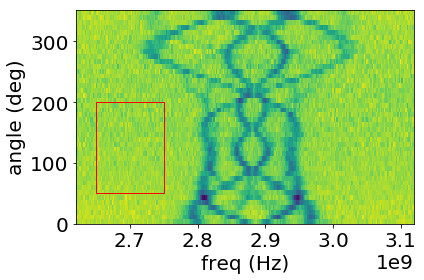

In [247]:
# angles = np.linspace(0, 360, esr_map.shape[0])
fig, ax = plt.subplots(1, 1, figsize=(6, 4))


ax.pcolor(frequencies, angles, esr_map)

# Create a Rectangle patch
rect = Rectangle((noise_region['fmin'],noise_region['angle_min']),
                 noise_region['f_range'],noise_region['angle_range'],linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

ax.set_ylabel('angle (deg)')
ax.set_xlabel('freq (Hz)')
# ax.set_title('theta = {:0.0f}, phi={:0.0f}'.format(theta_mag, phi_mag))
plt.tight_layout()

### Look at the noise

The noise is $n = \sqrt{c \tau}$, where $s = c \tau$ are the number of photons collected. Thus, the normalized noise is

$$n_{\rm norm} = n/s =  1 / \sqrt{c \tau}$$,

where $c$ is the count rate and $\tau$ the measurement time.

**noise: 0.12%**

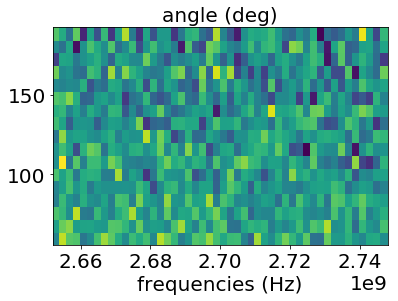

In [248]:
freq_select = np.array(frequencies>noise_region['fmin']) & np.array(frequencies<noise_region['fmin']+noise_region['f_range'])
angle_select = np.array(angles>noise_region['angle_min']) & np.array(angles<noise_region['angle_min']+noise_region['angle_range'])

noise = esr_map[angle_select][:,freq_select]
plt.pcolor(frequencies[freq_select], angles[angle_select], noise)
plt.title('noise')
plt.xlabel('frequencies (Hz)')
plt.title('angle (deg)')
display(Markdown('**noise: {:0.2f}%**'.format(noise.std() / noise.mean() * 100)))


### look at the distributions and get SNR

0.03377057881426171


**SNR: 28**

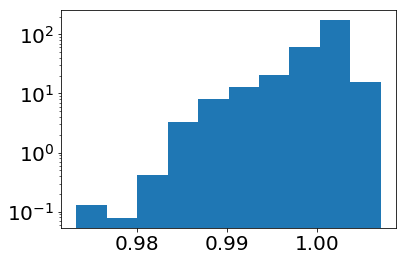

In [249]:
signal = esr_map.max() - esr_map.min()
print(signal)
display(Markdown('**SNR: {:0.0f}**'.format(signal / noise.std())))
plt.hist(esr_map.flatten(), density=True, log=True);

### fit model

**show available models**

In [114]:
# [f.split('/')[-1].split('_model.h5')[0] for f in glob('../models/*model*.h5')]
list(path_model.glob('*_model*'))

[PosixPath('../models/shot_noise_0_xyztp_model.h5')]

## load the model

In [115]:
model_name = 'shot_noise_0_xyztp_model.h5'

In [117]:
model = load_model(str(path_model/model_name))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 46, 446, 64)       640       
_________________________________________________________________
activation_43 (Activation)   (None, 46, 446, 64)       0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 23, 223, 64)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 21, 221, 128)      73856     
_________________________________________________________________
activation_44 (Activation)   (None, 21, 221, 128)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 10, 110, 128)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 108, 256)       295168    
__________

In [118]:
# load the scaler
x_scaler = joblib.load(str(path_model/model_name).replace('_model.h5', '_x_scaler.save'))  
y_scaler = joblib.load(str(path_model/model_name).replace('_model.h5', '_y_scaler.save')) 

In [124]:
# load the labels
with open(str(path_model/model_name).replace('_model.h5', '_labels.txt'),"r") as filein:
    labels = filein.read().split(',')
labels

['xo', 'yo', 'dipole_height', 'theta_mag', 'phi_mag']

### show how well model fits on simulated data

In [125]:
magnet_parameters

{'particle_radius': 19,
 'nv_radius': 67,
 'theta_mag': 0,
 'phi_mag': 60,
 'dipole_height': 80,
 'shot_noise': 0,
 'linewidth': 10000000.0,
 'n_angle': 48,
 'n_freq': 448,
 'f_min': 2620000000.0,
 'f_max': 3120000000.0,
 'avrg_count_rate': 1}

In [126]:
n_max = 5

magnet_parameters_new = {**magnet_parameters, 'particle_radius': 18}

print('genrate validation set')
val_set = generate_data(n_max, n_jobs=3, parameters={**magnet_parameters, 'particle_radius': 18})


noise = 0.02*np.random.randn(*val_set['X'].shape)
Xo = val_set['X'][0:n_max]+noise
Yo = val_set['Y']

Xo = esr_preprocessing(Xo)

print(Xo.min(), Xo.max())

  0%|          | 0/5 [00:00<?, ?it/s]

genrate validation set


100%|██████████| 5/5 [00:00<00:00, 25.10it/s]


-0.10620875001457097 0.19947846252565749


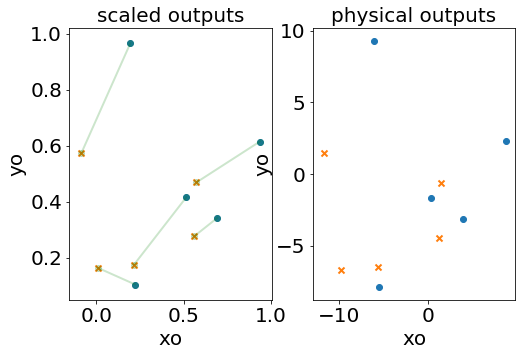

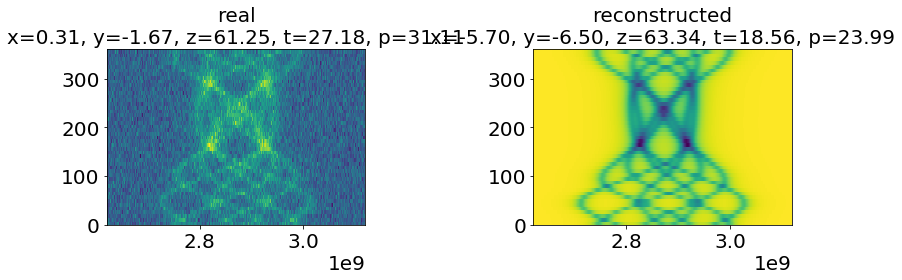

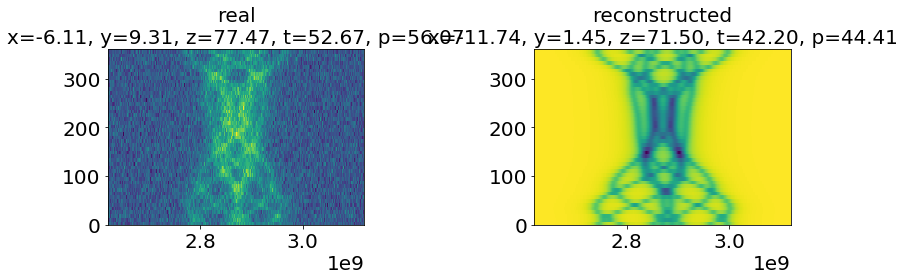

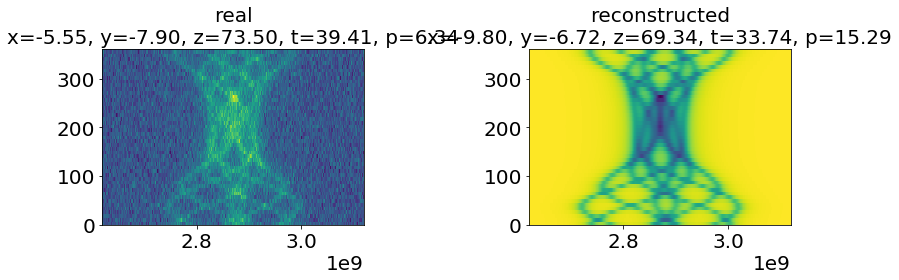

In [128]:
analyze_fit(Xo, Yo, model=model, magnet_parameters=magnet_parameters_new,labels=labels, n_max = n_max,
            x_scaler=x_scaler, y_scaler=y_scaler)

### make prediction for the data - dataset from

(-0.018397090258050808, 0.02567053537316233)

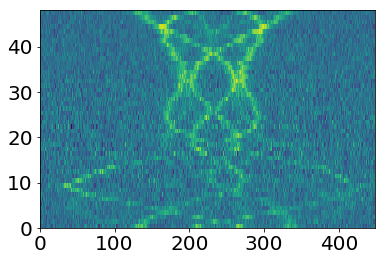

In [202]:
Xo = esr_preprocessing(np.expand_dims(esr_map, axis=0))
Xo = np.flip(Xo, axis=1)  # flip the image upside down
plt.pcolor(Xo[0])
Xo[0].min(), Xo[0].max()

(0.14355081, 0.32498577)

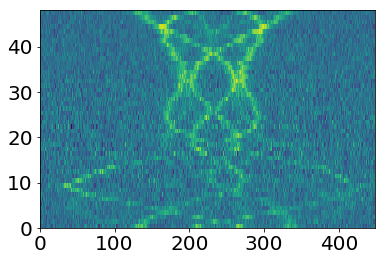

In [203]:
x_shape = Xo.shape
Xs = x_scaler.transform(Xo.reshape(x_shape[0], -1).astype(np.float32)).reshape(x_shape)
plt.pcolor(Xs[0])
Xs[0].min(), Xs[0].max()

In [204]:
esr_y_pred = model.predict(np.expand_dims(Xs, axis=-1))
esr_y_pred

array([[0.64326894, 0.5036489 , 0.88319635, 0.29864562, 0.34184837]],
      dtype=float32)

In [205]:
esr_y_pred_real = y_scaler.inverse_transform(esr_y_pred)

In [206]:
magnet_parameters

{'particle_radius': 19,
 'nv_radius': 67,
 'theta_mag': 0,
 'phi_mag': 60,
 'dipole_height': 80,
 'shot_noise': 0,
 'linewidth': 10000000.0,
 'n_angle': 48,
 'n_freq': 448,
 'f_min': 2620000000.0,
 'f_max': 3120000000.0,
 'avrg_count_rate': 1}

In [185]:
esr_y_pred_real[0,4]=45
esr_y_pred_real[0,3]=54

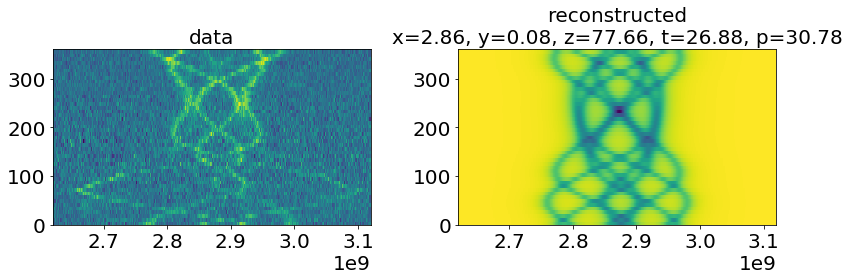

In [208]:
f_min = magnet_parameters['f_min']
f_max = magnet_parameters['f_max']
n_angle = magnet_parameters['n_angle']
n_freq = magnet_parameters['n_freq']
frequencies = np.linspace(f_min, f_max, n_freq)
angle = np.linspace(0, 360, n_angle)


fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].pcolor(frequencies, angle, np.squeeze(Xo[0]))
ax[0].set_title('data')
# and create the image, construction in second argument constructs the updates parameter dictionary
img = create_image(*esr_y_pred_real[0, 0:2],
                   **{**magnet_parameters, **{k: v for k, v in zip(labels[2:], esr_y_pred_real[0, 2:])}})
ax[1].pcolor(frequencies, angle, img)
ax[1].set_title(
    'reconstructed\n' + ', '.join([label_map[k] + '={:0.2f}' for k in labels]).format(*esr_y_pred_real[0]))
plt.tight_layout()

In [209]:
magnet_parameters

{'particle_radius': 19,
 'nv_radius': 67,
 'theta_mag': 0,
 'phi_mag': 60,
 'dipole_height': 80,
 'shot_noise': 0,
 'linewidth': 10000000.0,
 'n_angle': 48,
 'n_freq': 448,
 'f_min': 2620000000.0,
 'f_max': 3120000000.0,
 'avrg_count_rate': 1}

In [215]:
df = pd.DataFrame(3 * (np.random.random((20, 2)) - 0.5), columns=['xo', 'yo'])

In [217]:
df

""
0
1
2
3
4
5
6
7
8
9
